In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
REPORTS_DIR = "/s/ls4/users/grartem/RL_robots/CommandClassifier/models/"

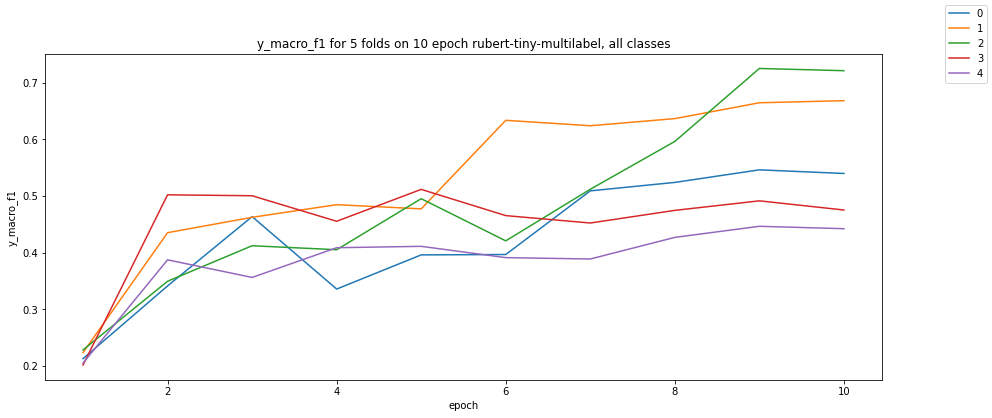

In [3]:
fig, axes  = plt.subplots(1,1)
experimentName = "rubert_tiny_multilabel"
for fold_i in range(5):
    y_macto_hist = []
    for epoch_i in range(1, 11):
        with open(os.path.join(REPORTS_DIR, experimentName, "fold_{}".format(fold_i), "reports", "epoch-{}_avg_report.json".format(epoch_i)), "r") as f:
            report = json.load(f)
            y_macto_hist.append(report['[y]_macrof1'])
    axes.plot(range(1, 11), y_macto_hist, label=fold_i)
    #break
axes.set_title("y_macro_f1 for 5 folds on 10 epoch rubert-tiny-multilabel, all classes")
axes.set_ylabel("y_macro_f1")
axes.set_xlabel("epoch")
fig.set_size_inches(15,6)
fig.legend()
plt.show()

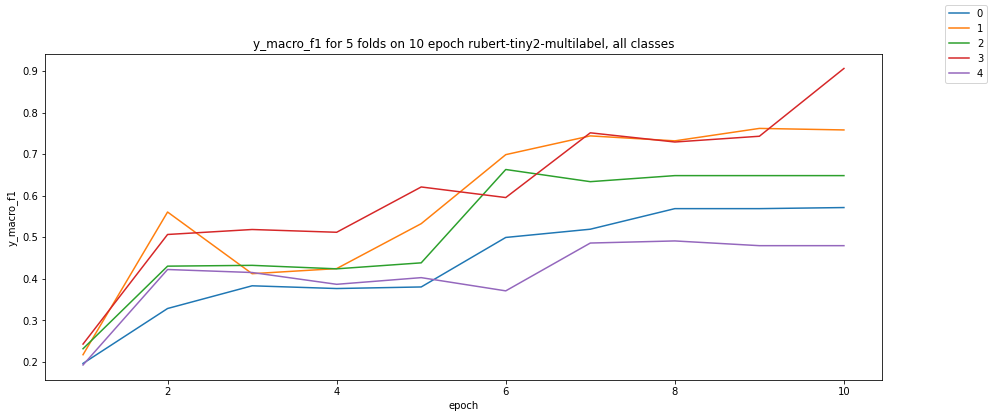

In [4]:
fig, axes  = plt.subplots(1,1)
experimentName = "rubert_tiny2_multilabel"
for fold_i in range(5):
    y_macto_hist = []
    for epoch_i in range(1, 11):
        with open(os.path.join(REPORTS_DIR, experimentName, "fold_{}".format(fold_i), "reports", "epoch-{}_avg_report.json".format(epoch_i)), "r") as f:
            report = json.load(f)
            y_macto_hist.append(report['[y]_macrof1'])
    axes.plot(range(1, 11), y_macto_hist, label=fold_i)

axes.set_title("y_macro_f1 for 5 folds on 10 epoch rubert-tiny2-multilabel, all classes")
axes.set_ylabel("y_macro_f1")
axes.set_xlabel("epoch")
fig.set_size_inches(15,6)
fig.legend()
plt.show()

In [5]:
# Y macro f1 for 10 epoch
table = []
for experimentName in ["rubert_tiny_multilabel", "rubert_tiny2_multilabel", "rubert_tiny2"]:
    table.append({
            "experiment": experimentName,
        })
    for fold_i in range(5):
        if not os.path.exists(os.path.join(REPORTS_DIR, experimentName, "fold_{}".format(fold_i), "reports", "epoch-{}_avg_report.json".format(10))):
            continue
        with open(os.path.join(REPORTS_DIR, experimentName, "fold_{}".format(fold_i), "reports", "epoch-{}_avg_report.json".format(10)), "r") as f:
            report = json.load(f)
        table[-1]["fold_{}".format(fold_i)] = report['[y]_macrof1']
table_df = pd.DataFrame(table)
table_df

,experiment,fold_0,fold_1,fold_2,fold_3,fold_4
0,rubert_tiny_multilabel,0.539720,0.668353,0.721336,0.475176,0.442132
1,rubert_tiny2_multilabel,0.571141,0.758131,0.648099,0.906229,0.479331
2,rubert_tiny2,0.495697,0.764911,0.746063,0.895857,0.589891


In [6]:
# Смотрим % угадывания шаблона или Y
table = []
for experimentName in ["rubert_tiny_multilabel", "rubert_tiny2_multilabel"]:
    table.append({
            "experiment": experimentName,
        })
    for fold_i in range(5):
        if not os.path.exists(os.path.join(REPORTS_DIR, experimentName, "fold_{}".format(fold_i), "reports", "epoch-{}_avg_report.json".format(10))):
            continue
        with open(os.path.join(REPORTS_DIR, experimentName, "fold_{}".format(fold_i), "reports", "epoch-{}_avg_report.json".format(10)), "r") as f:
            report = json.load(f)
        table[-1]["fold_{}".format(fold_i)] = np.round(100*report['[y]_acc'], 2)
for experimentName in ["rubert_tiny2_labelflag"]:
    table.append({
            "experiment": experimentName,
        })
    for fold_i in range(5):
        if not os.path.exists(os.path.join(REPORTS_DIR, experimentName, "fold_{}".format(fold_i), "reports", "epoch-{}_avg_report.json".format(10))):
            continue
        with open(os.path.join(REPORTS_DIR, experimentName, "fold_{}".format(fold_i), "reports", "epoch-{}_avg_report.json".format(10)), "r") as f:
            report = json.load(f)
        table[-1]["fold_{}".format(fold_i)] = np.round(100*report['correct_samples_perc'], 2)

table_df = pd.DataFrame(table)
table_df

,experiment,fold_0,fold_1,fold_2,fold_3,fold_4
0,rubert_tiny_multilabel,92.05,95.45,95.83,94.30,90.87
1,rubert_tiny2_multilabel,93.56,97.35,96.97,96.96,90.11
2,rubert_tiny2_labelflag,93.56,96.59,96.21,97.34,93.54
